
#<font color='blue'>Atividade Extensionista 2 - Uninter</font>

#Instalações de Frameworks

In [1]:
!pip install tensorflow

In [2]:
!pip install scikit-learn

In [3]:
# Silencia mensagens do TF
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [4]:
!pip install keras

Imports necessários ao processo:

In [5]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# Criando as pastas para carregamento das imagens no Google Drive:

In [38]:
import os

# Importe a biblioteca do Google Drive
from google.colab import drive

# Monte o Google Drive
drive.mount('/content/drive')

# Crie a pasta "imagens"
os.mkdir('/content/drive/My Drive/imagens')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Código para conferir quantas imagens existem em cada pasta criada

In [39]:
from google.colab import drive

# Caminho para a pasta com as imagens de tórax com pneumonia
path_pneumonia = '/content/drive/My Drive/imagens/PNEUMONIA'

# Contagem do número de arquivos de imagem na pasta
import os

image_count = len(os.listdir(path_pneumonia))
print("Número de imagens de tórax com pneumonia:", image_count)


Número de imagens de tórax com pneumonia: 1350


Código para deletar imgens caso estas ultrapassem o número 1350.

In [40]:
from google.colab import drive
import os

# Caminho para a pasta com as imagens de tórax com pneumonia
path_pneumonia = '/content/drive/My Drive/imagens/PNEUMONIA'

# Conta o número de arquivos de imagem na pasta
image_count = len(os.listdir(path_pneumonia))
print("Número de imagens de tórax com pneumonia:", image_count)

# Limite desejado de imagens
target_count = 1350

# Se houver mais imagens do que o limite desejado, vai remover as extras
if image_count > target_count:
    images_to_remove = image_count - target_count
    print(f"Removendo {images_to_remove} imagens em excesso...")
    # Obtenha a lista de arquivos na pasta
    image_files = os.listdir(path_pneumonia)
    # Classificação dos arquivos para manter os mesmos ao remover
    image_files.sort()
    # Remove as imagens extras acima do limite desejado
    for i in range(images_to_remove):
        os.remove(os.path.join(path_pneumonia, image_files[i]))
    print("Imagens removidas com sucesso.")
elif image_count == target_count:
    print("O número de imagens já está correto.")
else:
    print("O número de imagens é menor do que o desejado.")


Número de imagens de tórax com pneumonia: 1350
O número de imagens já está correto.


#Carregamento e conversão das imagens

In [ ]:
#Carrega as imagens de tórax saudável
import cv2
import numpy as np

# Caminho para a pasta com as imagens de tórax saudável
path_normal = '/content/drive/My Drive/imagens/NORMAL'

# Lista de imagens
images_normal = []

# Abre cada imagem e a converte em um array NumPy
for image_file in os.listdir(path_normal):
    image = cv2.imread(os.path.join(path_normal, image_file))
    image = cv2.resize(image, (224, 224))
    images_normal.append(image)

# Converte a lista de imagens em um array NumPy
images_normal = np.array(images_normal)


In [ ]:
#Carrega as imagens de tórax com pneumonia
import cv2
import numpy as np
import os

# Caminho para a pasta com as imagens de tórax saudável
path_pneumonia = '/content/drive/My Drive/imagens/PNEUMONIA'

# Lista de imagens
images_pneumonia = []

# Abre cada imagem e a converte em um array NumPy
for image_file in os.listdir(path_pneumonia):
    image = cv2.imread(os.path.join(path_pneumonia, image_file))
    image = cv2.resize(image, (224, 224))
    images_pneumonia.append(image)

# Converte a lista de imagens em um array NumPy
images_pneumonia = np.array(images_pneumonia)

Função para visualizar e conferir uma parte das imagens de Pneumonia e Saudável

In [ ]:
import matplotlib.pyplot as plt

def visualiza_imagens(images_normal, images_pneumonia):
    fig, axes = plt.subplots(2, 10, figsize=(10, 4))
    for i in range(10):
        axes[0, i].imshow(images_normal[i], cmap='gray')
        axes[0, i].set_title("Saudável")
        axes[0, i].axis('off')  # Remove os eixos

        axes[1, i].imshow(images_pneumonia[i], cmap='gray')
        axes[1, i].set_title("Pneumonia")
        axes[1, i].axis('off')  # Remove os eixos

    plt.tight_layout()
    plt.show()

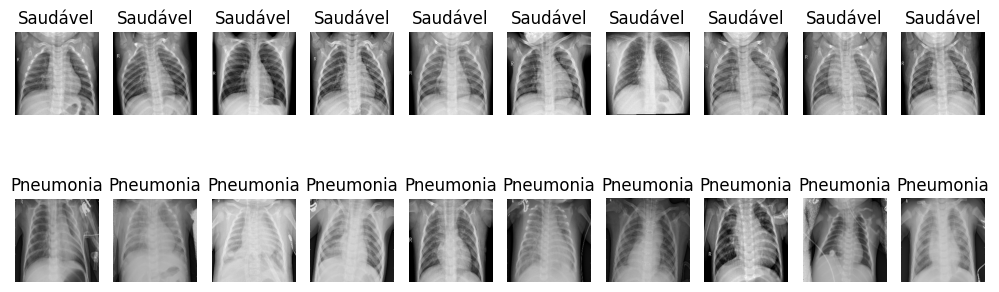

In [ ]:
visualiza_imagens(images_normal, images_pneumonia)

Representação ilustrativa da Rede Neural Convolucional CNN

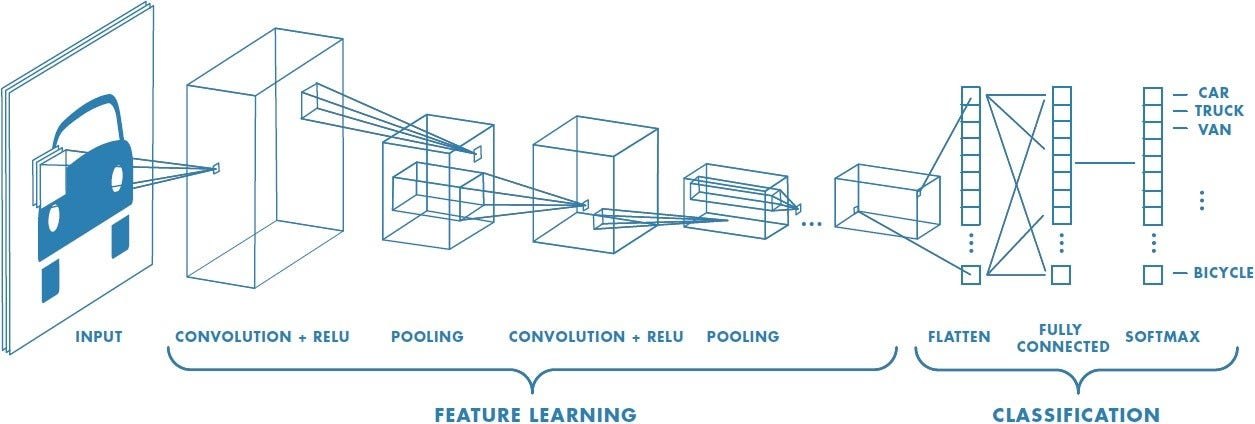

#Pré processamento dos dados

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Cria os rótulos para as imagens
labels_normal = ['NORMAL'] * len(images_normal)
labels_pneumonia = ['PNEUMONIA'] * len(images_pneumonia)

# Concatena todas as imagens e rótulos
all_images = np.concatenate((images_normal, images_pneumonia), axis=0)
all_labels = np.concatenate((labels_normal, labels_pneumonia), axis=0)

# Normaliza os valores de pixel para o intervalo [0, 1]
all_images = all_images / 255.0

# Codifica os rótulos em valores numéricos
label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)

# Converte os rótulos codificados em one-hot encoding
all_labels_encoded_categorical = to_categorical(all_labels_encoded)

# Divide os dados em conjuntos de treinamento, validação e teste
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels_encoded_categorical, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 60% treino, 20% validação, 20% teste


#Treinamento do modelo

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Cria o modelo CNN
model = Sequential()

# Adiciona camadas de convolução e pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten (achatamento) para preparar os dados para a camada conectada
model.add(Flatten())

# Adiciona camadas densas e uma camada de saída
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Duas classes: NORMAL e PNEUMONIA

# Compila o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treina o modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
35/35 [==============================] - 180s 5s/step - loss: 1.0448 - accuracy: 0.7480 - val_loss: 0.4078 - val_accuracy: 0.8283
Epoch 2/10
35/35 [==============================] - 180s 5s/step - loss: 0.2099 - accuracy: 0.9136 - val_loss: 0.1542 - val_accuracy: 0.9292
Epoch 3/10
35/35 [==============================] - 163s 5s/step - loss: 0.1694 - accuracy: 0.9418 - val_loss: 0.1304 - val_accuracy: 0.9646
Epoch 4/10
35/35 [==============================] - 163s 5s/step - loss: 0.0926 - accuracy: 0.9627 - val_loss: 0.1331 - val_accuracy: 0.9428
Epoch 5/10
35/35 [==============================] - 191s 6s/step - loss: 0.0891 - accuracy: 0.9672 - val_loss: 0.1101 - val_accuracy: 0.9591
Epoch 6/10
35/35 [==============================] - 184s 5s/step - loss: 0.0837 - accuracy: 0.9691 - val_loss: 0.0841 - val_accuracy: 0.9646
Epoch 7/10
35/35 [==============================] - 164s 5s/step - loss: 0.0551 - accuracy: 0.9782 - val_loss: 0.0921 - val_accuracy: 0.9537
Epoch 8/10
35

In [ ]:
# Salva o modelo treinado no Google Drive
model.save('/content/drive/My Drive/chapaTorax.h5')

#Deploy do Modelo

In [23]:
# Carrega uma nova imagem - toráx com pneumonia
from PIL import Image
nova_imagem = Image.open("torax_pneumonia.jpeg")

In [7]:
# Carrega uma nova imagem - torax saudavel
from PIL import Image
nova_imagem = Image.open("torax_saudavel.jpg")

In [24]:
# Dimensões da imagem (em pixels)
nova_imagem.size

(257, 196)

In [25]:
# Obtém largura e altura da imagem
largura = nova_imagem.width
altura = nova_imagem.height
print(f"A largura da imagem é: {largura}.")
print(f"A altura da imagem é: {altura}.")

A largura da imagem é: 257.
A altura da imagem é: 196.


Redimensionando o tamanho da imagem conforme aceito pelo modelo

In [26]:
nova_imagem = nova_imagem.resize((224, 224))

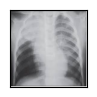

In [27]:
# Exibir a imagem
plt.figure(figsize=(1, 1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()

In [28]:
# Converte a imagem para um array NumPy e a normaliza
nova_imagem_array = np.array(nova_imagem, dtype='float32') / 255.0

In [29]:
# Expande a dimensão do array para que este tenha o formato (1, 224, 224, 3)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

Conecta ao google drive e chama o modelo

In [30]:
import os

# Importa do Google Drive
from google.colab import drive

# Monta o Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import tensorflow as tf

# Carrega o modelo
model = tf.keras.models.load_model('/content/drive/My Drive/chapaTorax.h5')

chapaTorax = model

# Previsões
previsoes = chapaTorax.predict(nova_imagem_array)

1/1 [==============================] - 0s 175ms/step


In [41]:
print(previsoes)

[[6.880796e-07 9.999993e-01]]


In [32]:
# Resumo do modelo
chapaTorax.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [35]:
# Classe das imagens
nomes_classes = ['Normal', 'Pneumonia']

In [36]:
# Obtém o nome e a classe com maior probabilidade
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [21]:
# Impressão condicional exemplo de imagem tórax saudável
if classe_prevista == 0:
    print("Tórax saudável!")
else:
    print("Tórax identificado com pneumonia. Procure um médico urgentemente!")

Tórax saudável!


In [37]:
# Impressão condicional exemplo tórax com pneumonia
if classe_prevista == 0:
    print("Tórax saudável!")
else:
    print("Tórax identificado com pneumonia. Procure um médico urgentemente!")

Tórax identificado com pneumonia. Procure um médico urgentemente!


##Links de acesso ao modelo e às imagens:

Imagens: https://drive.google.com/drive/folders/12C82iwj4K5BOGmJZhHxbN8GWRbr2OTNT?usp=drive_link

Modelo chapaTorax: https://drive.google.com/file/d/1-2qdFNDDqh7uGd7ngQ2_JBWAxXDV1KoK/view?usp=drive_link

#FIM